In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
box = pd.read_csv(r'C:\Users\Admin\Desktop\Datathon\Problem 3\boxes.csv')
purchase= pd.read_csv(r'C:\Users\Admin\Desktop\Datathon\Problem 3\purchase.csv')

In [3]:
purchase.dropna(subset=['BOX_ID', 'BOX_COUNT'], inplace=True)

# Convert PURCHASE_DATE to datetime
purchase['PURCHASE_DATE'] = pd.to_datetime(purchase['PURCHASE_DATE'], format='%d/%m/%Y')

# Convert BOX_ID to integer
purchase['BOX_ID'] = purchase['BOX_ID'].astype('int32')

# Convert BOX_COUNT to integer
purchase['BOX_COUNT'] = purchase['BOX_COUNT'].astype('int32')

box['BOX_ID'] = box['BOX_ID'].astype('int32')

box = box.drop_duplicates()
purchase = purchase.drop_duplicates()

In [4]:
df = pd.merge(box, purchase, how='inner')
df.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,PURCHASE_DATE,MAGIC_KEY,BOX_COUNT
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96,2019-02-04,2C88D36D1FC,1
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2019-01-02,2BF011BDB38,1
2,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2019-01-02,2CA0EE8F2B3,1
3,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2019-01-02,2C623730B09,1
4,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2019-01-02,2CA6CE1054F,1


In [5]:
df = df.drop(columns=['BOX_ID', 'QUALITY', 'DELIVERY_OPTION'])
df.head()

,MILK,MEAT,UNIT_PRICE,PURCHASE_DATE,MAGIC_KEY,BOX_COUNT
0,0.0,2.7,9.96,2019-02-04,2C88D36D1FC,1
1,0.0,2.3,11.96,2019-01-02,2BF011BDB38,1
2,0.0,2.3,11.96,2019-01-02,2CA0EE8F2B3,1
3,0.0,2.3,11.96,2019-01-02,2C623730B09,1
4,0.0,2.3,11.96,2019-01-02,2CA6CE1054F,1


In [6]:
df['MONEY_SPENT'] = df['BOX_COUNT'] * df['UNIT_PRICE']
df.head()

,MILK,MEAT,UNIT_PRICE,PURCHASE_DATE,MAGIC_KEY,BOX_COUNT,MONEY_SPENT
0,0.0,2.7,9.96,2019-02-04,2C88D36D1FC,1,9.96
1,0.0,2.3,11.96,2019-01-02,2BF011BDB38,1,11.96
2,0.0,2.3,11.96,2019-01-02,2CA0EE8F2B3,1,11.96
3,0.0,2.3,11.96,2019-01-02,2C623730B09,1,11.96
4,0.0,2.3,11.96,2019-01-02,2CA6CE1054F,1,11.96


In [7]:
min_date = df['PURCHASE_DATE'].min()
max_date = df['PURCHASE_DATE'].max()

print(f"The earliest transaction date is: {min_date}")
print(f"The latest transaction date is: {max_date}")


The earliest transaction date is: 2018-10-01 00:00:00
The latest transaction date is: 2019-02-28 00:00:00


In [8]:
# Function to assign half-month labels
def assign_half_month_label(date):
    year_month = date.strftime('%b%y')
    if date.day <= 15:
        return f'{year_month} 1st'
    else:
        return f'{year_month} 2nd'

df['HALF_MONTH_LABEL'] = df['PURCHASE_DATE'].apply(assign_half_month_label)

In [9]:
# Aggregate the data
aggregated_data = df.groupby(['MAGIC_KEY', 'HALF_MONTH_LABEL']).agg({
    'MILK': 'sum',
    'MEAT': 'sum'
}).unstack(fill_value=0)


In [10]:
# Pivot and flatten the DataFrame
aggregated_data.columns = [' '.join(col).strip() for col in aggregated_data.columns.values]
# Reset the index to make MAGIC_KEY a column
aggregated_data.reset_index(inplace=True)

In [11]:
aggregated_data.head()

,MAGIC_KEY,MILK Dec18 1st,MILK Dec18 2nd,MILK Feb19 1st,MILK Feb19 2nd,MILK Jan19 1st,MILK Jan19 2nd,MILK Nov18 1st,MILK Nov18 2nd,MILK Oct18 1st,...,MEAT Dec18 1st,MEAT Dec18 2nd,MEAT Feb19 1st,MEAT Feb19 2nd,MEAT Jan19 1st,MEAT Jan19 2nd,MEAT Nov18 1st,MEAT Nov18 2nd,MEAT Oct18 1st,MEAT Oct18 2nd
0,249670911D8,0.0,0.0,8.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.4,0.0,0.0,0.0
1,249751FC4DD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0
2,24978027606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9
3,24979164422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0
4,2497B8B4FDA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.6,0.0,1.8,0.0


In [12]:
# Select only columns related to meat purchases and the MAGIC_KEY
meat_columns = [col for col in aggregated_data.columns if 'MEAT' in col] + ['MAGIC_KEY']
filtered_meat_data = aggregated_data[meat_columns]

# Reorder the columns to put MAGIC_KEY first
filtered_meat_data = filtered_meat_data[['MAGIC_KEY'] + [col for col in filtered_meat_data.columns if col != 'MAGIC_KEY']]

filtered_meat_data.head()

,MAGIC_KEY,MEAT Dec18 1st,MEAT Dec18 2nd,MEAT Feb19 1st,MEAT Feb19 2nd,MEAT Jan19 1st,MEAT Jan19 2nd,MEAT Nov18 1st,MEAT Nov18 2nd,MEAT Oct18 1st,MEAT Oct18 2nd
0,249670911D8,0.0,0.0,0.0,0.0,0.0,0.0,2.4,0.0,0.0,0.0
1,249751FC4DD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0
2,24978027606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9
3,24979164422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0
4,2497B8B4FDA,0.0,0.0,0.0,0.0,0.0,0.0,3.6,0.0,1.8,0.0


In [13]:
summary_stats = filtered_meat_data.describe()
print(summary_stats)

       MEAT Dec18 1st  MEAT Dec18 2nd  MEAT Feb19 1st  MEAT Feb19 2nd  \
count    1.274087e+06    1.274087e+06    1.274087e+06    1.274087e+06   
mean     3.723509e-01    4.144474e-01    4.948373e-01    5.013217e-01   
std      9.194342e-01    9.697643e-01    1.015862e+00    1.041606e+00   
min      0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
25%      0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
50%      0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
75%      0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
max      1.370000e+01    1.440000e+01    1.720000e+01    2.520000e+01   

       MEAT Jan19 1st  MEAT Jan19 2nd  MEAT Nov18 1st  MEAT Nov18 2nd  \
count    1.274087e+06    1.274087e+06    1.274087e+06    1.274087e+06   
mean     4.480501e-01    4.255141e-01    3.520397e-01    3.146958e-01   
std      9.790533e-01    9.600878e-01    8.569099e-01    8.285964e-01   
min      0.000000e+00    0.000000e+00    0.000000e

In [14]:
import re

# Extract the existing DataFrame columns
columns = filtered_meat_data.columns.tolist()

# Exclude 'MAGIC_KEY' from the sorting process
columns.remove('MAGIC_KEY')

# Function to parse the date from column names
def parse_date_from_column(column):
    month_map = {'Oct': 10, 'Nov': 11, 'Dec': 12, 'Jan': 1, 'Feb': 2}
    # Update the regex to correctly capture the month and the last two digits of the year
    parts = re.search(r'MEAT (\D+)(\d+) (\d+)(st|nd)', column)
    if parts:
        month = month_map[parts.group(1)]
        year_suffix = int(parts.group(2))
        part = 1 if parts.group(3) == '1st' else 2
        # Adjust year based on the understanding of your dataset's year span
        year = 2000 + year_suffix if month >= 10 else 2001 + year_suffix
        return (year, month, part)
    return (9999, 99, 99)  # Returns a high value for unmatched patterns or errors

# Sort columns based on the parsed date
sorted_columns = sorted(columns, key=parse_date_from_column)

# Reinsert 'MAGIC_KEY' at the first position
sorted_columns.insert(0, 'MAGIC_KEY')

# Reorder the DataFrame columns
sorted_meat_data = filtered_meat_data[sorted_columns]

sorted_meat_data.head()


,MAGIC_KEY,MEAT Oct18 1st,MEAT Oct18 2nd,MEAT Nov18 1st,MEAT Nov18 2nd,MEAT Dec18 1st,MEAT Dec18 2nd,MEAT Jan19 1st,MEAT Jan19 2nd,MEAT Feb19 1st,MEAT Feb19 2nd
0,249670911D8,0.0,0.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,249751FC4DD,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24978027606,0.0,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24979164422,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0
4,2497B8B4FDA,1.8,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ektu visual EDA!

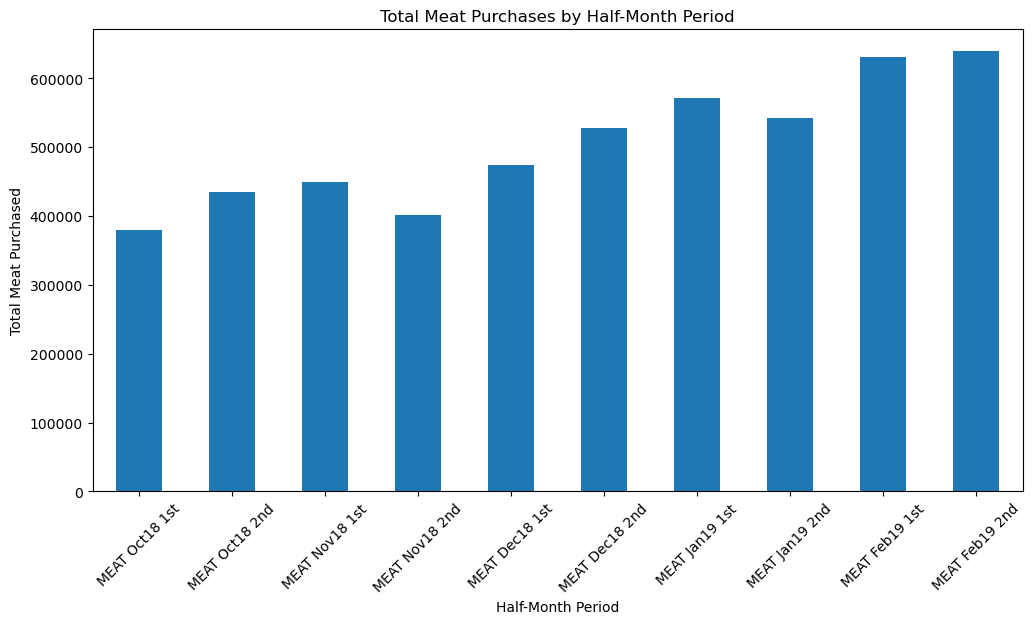

In [15]:
# Calculate total meat purchases for each half-month period (excluding the MAGIC_KEY column)
meat_totals = sorted_meat_data.drop('MAGIC_KEY', axis=1).sum()

# Plotting the totals
plt.figure(figsize=(12, 6))
meat_totals.plot(kind='bar')
plt.title('Total Meat Purchases by Half-Month Period')
plt.xlabel('Half-Month Period')
plt.ylabel('Total Meat Purchased')
plt.xticks(rotation=45)
plt.show()

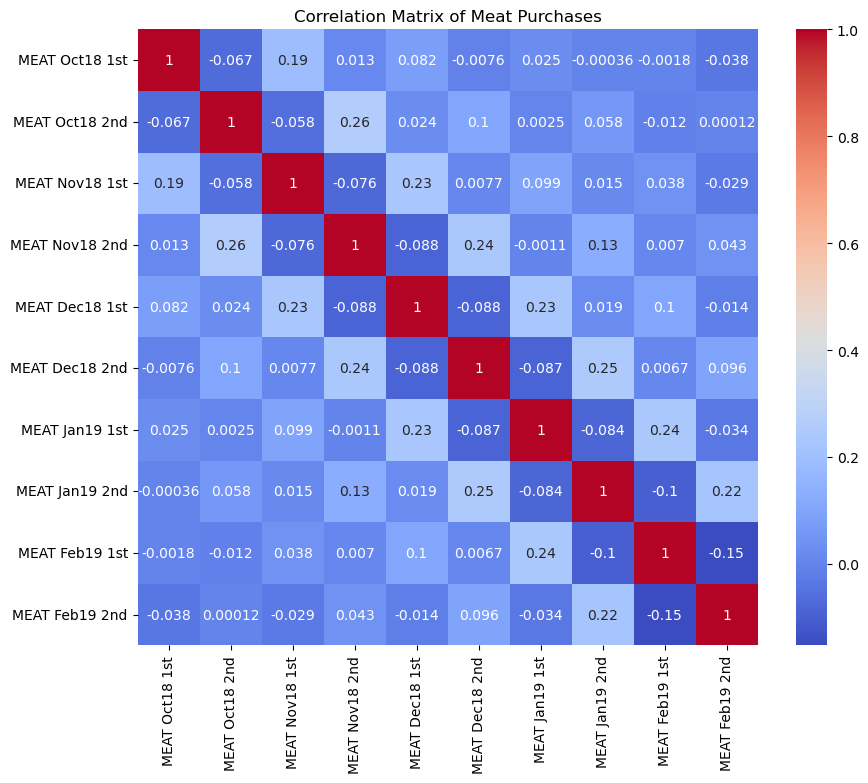

In [16]:
# Calculate the correlation matrix
correlation_matrix = sorted_meat_data.drop('MAGIC_KEY', axis=1).corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Meat Purchases')
plt.show()

In [17]:
# Calculate the total meat purchased by each customer
sorted_meat_data['Total Meat Purchased'] = sorted_meat_data.drop('MAGIC_KEY', axis=1).sum(axis=1)
# Calculate the average meat purchased every 15 days
sorted_meat_data['Avg Meat Every 15 Days'] = sorted_meat_data['Total Meat Purchased'] / 10
sorted_meat_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15140\2190770924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_meat_data['Total Meat Purchased'] = sorted_meat_data.drop('MAGIC_KEY', axis=1).sum(axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15140\2190770924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_meat_data['Avg Meat Every 15 Days'] = sorted_meat_data['Total Meat Purchased'] / 10


,MAGIC_KEY,MEAT Oct18 1st,MEAT Oct18 2nd,MEAT Nov18 1st,MEAT Nov18 2nd,MEAT Dec18 1st,MEAT Dec18 2nd,MEAT Jan19 1st,MEAT Jan19 2nd,MEAT Feb19 1st,MEAT Feb19 2nd,Total Meat Purchased,Avg Meat Every 15 Days
0,249670911D8,0.0,0.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4,0.24
1,249751FC4DD,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.18
2,24978027606,0.0,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9,0.29
3,24979164422,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.25
4,2497B8B4FDA,1.8,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.4,0.54


In [18]:
sorted_meat_data[['Avg Meat Every 15 Days', 'Total Meat Purchased']].describe()

,Avg Meat Every 15 Days,Total Meat Purchased
count,1.274087e+06,1.274087e+06
mean,3.961946e-01,3.961946e+00
std,3.373707e-01,3.373707e+00
min,0.000000e+00,0.000000e+00
25%,2.000000e-01,2.000000e+00
50%,2.500000e-01,2.500000e+00
75%,5.000000e-01,5.000000e+00
max,1.099000e+01,1.099000e+02


Text(0.5, 1.0, 'Histogram of Avg Meat Every 15 Days')

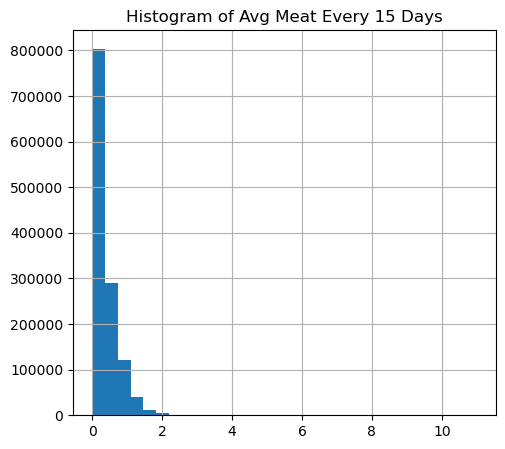

In [19]:
# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sorted_meat_data['Avg Meat Every 15 Days'].hist(bins=30)
plt.title('Histogram of Avg Meat Every 15 Days')


<Axes: >

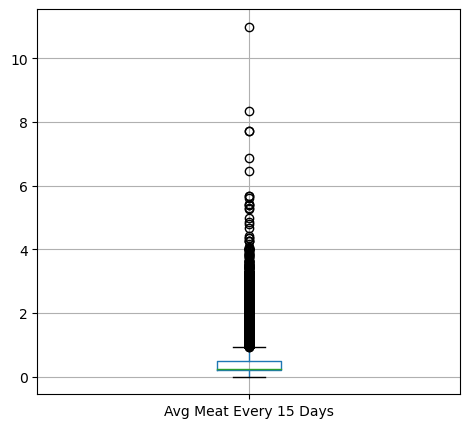

In [20]:
# Boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sorted_meat_data.boxplot(column=['Avg Meat Every 15 Days'])

([], [])

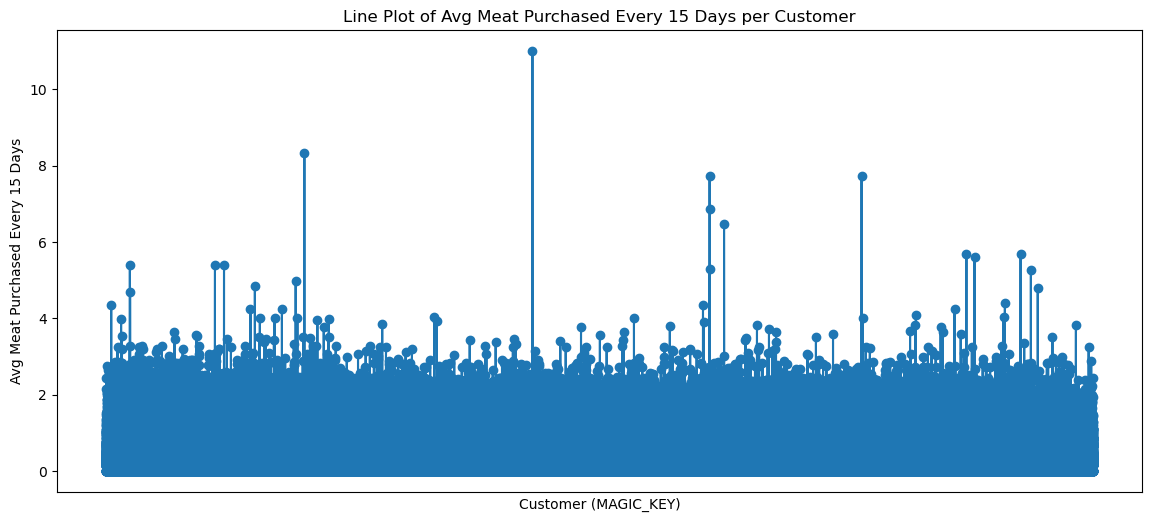

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(sorted_meat_data['MAGIC_KEY'], sorted_meat_data['Avg Meat Every 15 Days'], marker='o')
plt.title('Line Plot of Avg Meat Purchased Every 15 Days per Customer')
plt.xlabel('Customer (MAGIC_KEY)')
plt.ylabel('Avg Meat Purchased Every 15 Days')
plt.xticks([])  # Hides the x-axis labels

In [22]:
# For each row (across the columns), count the number of times meat purchase is greater than 0
sorted_meat_data['Frequency of 15 Days'] = (sorted_meat_data.iloc[:, 1:11] > 0).sum(axis=1)
sorted_meat_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15140\3293371789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_meat_data['Frequency of 15 Days'] = (sorted_meat_data.iloc[:, 1:11] > 0).sum(axis=1)


,MAGIC_KEY,MEAT Oct18 1st,MEAT Oct18 2nd,MEAT Nov18 1st,MEAT Nov18 2nd,MEAT Dec18 1st,MEAT Dec18 2nd,MEAT Jan19 1st,MEAT Jan19 2nd,MEAT Feb19 1st,MEAT Feb19 2nd,Total Meat Purchased,Avg Meat Every 15 Days,Frequency of 15 Days
0,249670911D8,0.0,0.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4,0.24,1
1,249751FC4DD,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.18,1
2,24978027606,0.0,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9,0.29,1
3,24979164422,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.25,1
4,2497B8B4FDA,1.8,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.4,0.54,2


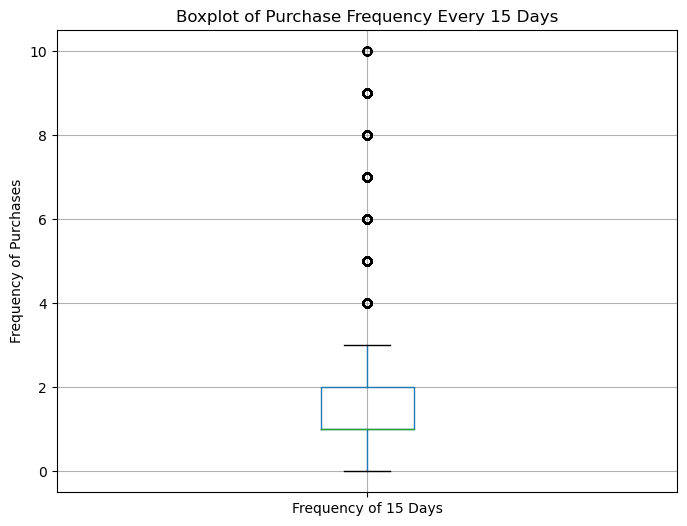

In [23]:
# Boxplot for 'Frequency of Buying 15 Days'
plt.figure(figsize=(8, 6))
sorted_meat_data.boxplot(column=['Frequency of 15 Days'])
plt.title('Boxplot of Purchase Frequency Every 15 Days')
plt.ylabel('Frequency of Purchases')
plt.show()


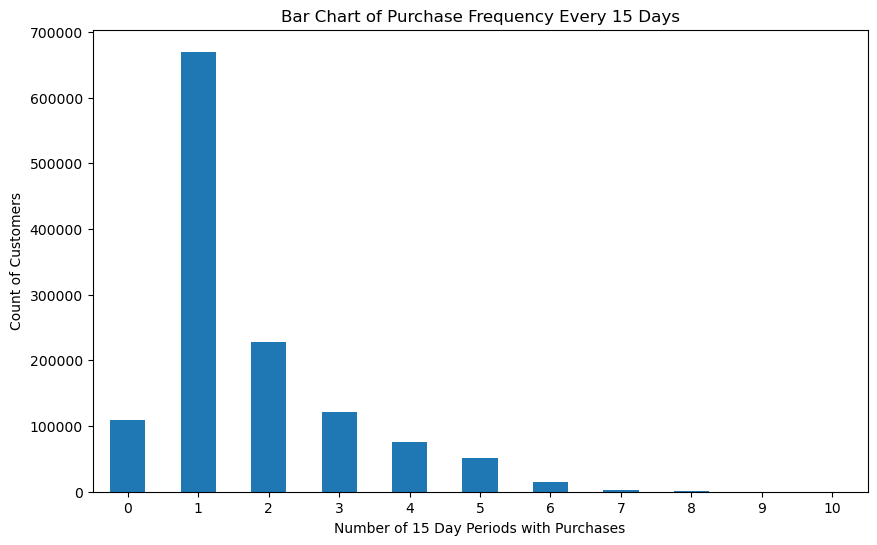

In [24]:
# Bar chart for 'Frequency of Buying 15 Days'
frequency_counts = sorted_meat_data['Frequency of 15 Days'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar')
plt.title('Bar Chart of Purchase Frequency Every 15 Days')
plt.xlabel('Number of 15 Day Periods with Purchases')
plt.ylabel('Count of Customers')
plt.xticks(rotation=0)
plt.show()

In [25]:
# Create a new DataFrame with only the MAGIC_KEY and 'Avg Meat Every 15 Days' columns
final_data = sorted_meat_data[['MAGIC_KEY', 'Avg Meat Every 15 Days']].copy()

# Rename the 'Avg Meat Every 15 Days' column to 'meat_quantity'
final_data.rename(columns={'Avg Meat Every 15 Days': 'meat_quantity'}, inplace=True)

# Rename the 'meat_quantity' column to 'MEAT'
final_data.rename(columns={'meat_quantity': 'MEAT'}, inplace=True)

final_data.head()

,MAGIC_KEY,MEAT
0,249670911D8,0.24
1,249751FC4DD,0.18
2,24978027606,0.29
3,24979164422,0.25
4,2497B8B4FDA,0.54


In [26]:
problem = pd.read_csv(r'C:\Users\Admin\Desktop\Datathon\Problem 3\problem_3.csv')
problem.shape

(5379, 1)

In [27]:
final_data_unique = final_data.drop_duplicates(subset='MAGIC_KEY')
merged_data = problem.merge(final_data_unique, on='MAGIC_KEY', how='left')

In [28]:
merged_data.head()

,MAGIC_KEY,MEAT
0,2BCFE9C06A7,1.80
1,2C2A872B5A2,0.40
2,2C6A897671B,0.66
3,2C6F1287F53,3.18
4,2C658198CC9,0.66


In [30]:
merged_data.isnull().sum()

MAGIC_KEY    0
MEAT         1
dtype: int64

In [31]:
merged_data['MEAT'] = merged_data['MEAT'].fillna(0)

In [32]:
merged_data.isnull().sum()

MAGIC_KEY    0
MEAT         0
dtype: int64

In [33]:
#merged_data.to_csv('submission.csv', index=False)

In [35]:
sorted_meat_data.head()

,MAGIC_KEY,MEAT Oct18 1st,MEAT Oct18 2nd,MEAT Nov18 1st,MEAT Nov18 2nd,MEAT Dec18 1st,MEAT Dec18 2nd,MEAT Jan19 1st,MEAT Jan19 2nd,MEAT Feb19 1st,MEAT Feb19 2nd,Total Meat Purchased,Avg Meat Every 15 Days,Frequency of 15 Days
0,249670911D8,0.0,0.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4,0.24,1
1,249751FC4DD,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.18,1
2,24978027606,0.0,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9,0.29,1
3,24979164422,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.25,1
4,2497B8B4FDA,1.8,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.4,0.54,2


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature Engineering
# (Create your features based on past purchase patterns, etc.)

# Preprocessing
# Assume X are the features and y is the target variable
X = sorted_meat_data.drop(columns=['MAGIC_KEY', 'MEAT Feb19 2nd'])  # Example features
y = sorted_meat_data['MEAT Feb19 2nd']  # Example target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'The Mean Squared Error of the model is: {mse}')

# Predict for March
# For actual prediction, you would retrain the model on the entire dataset and predict on the March data

The Mean Squared Error of the model is: 0.02002132518895839


In [36]:
# Calculate RMSE using the MSE value
rmse = np.sqrt(mse)
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse}')

The Root Mean Squared Error (RMSE) of the model is: 0.14149673207872468


In [37]:
from sklearn.ensemble import RandomForestRegressor

X_full = sorted_meat_data.drop(columns=['MAGIC_KEY', 'MEAT Feb19 2nd'])  # Example features
y_full = sorted_meat_data['MEAT Feb19 2nd']  # Example target

# Initialize the model
model_full = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the entire dataset
model_full.fit(X_full, y_full)

# Predict using the same features, because we're demonstrating and have no future data here
y_full_pred = model_full.predict(X_full)

# Evaluate the model
mse = mean_squared_error(y_full, y_full_pred)
print(f'The Mean Squared Error of the model is: {mse}')

# Calculate RMSE using the MSE value
rmse = np.sqrt(mse)
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse}')

The Mean Squared Error of the model is: 0.002750330949142403
The Root Mean Squared Error (RMSE) of the model is: 0.052443597789838974


In [38]:
# Append the predictions to the sorted_meat_data DataFrame
sorted_meat_data['Predicted MEAT'] = y_full_pred
final_data_2 = sorted_meat_data[['MAGIC_KEY', 'Predicted MEAT']]
final_data_2.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15140\988619616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_meat_data['Predicted MEAT'] = y_full_pred


,MAGIC_KEY,Predicted MEAT
0,249670911D8,0.0
1,249751FC4DD,0.0
2,24978027606,0.0
3,24979164422,0.0
4,2497B8B4FDA,0.0


In [42]:
final_data_unique_2 = final_data_2.drop_duplicates(subset='MAGIC_KEY')
merged_data_2 = problem.merge(final_data_unique_2, on='MAGIC_KEY', how='left')

In [44]:
# Rename the 'meat_quantity' column to 'MEAT'
merged_data_2.rename(columns={'Predicted MEAT': 'MEAT'}, inplace=True)

In [45]:
merged_data_2.head()

,MAGIC_KEY,MEAT
0,2BCFE9C06A7,18.00
1,2C2A872B5A2,0.00
2,2C6A897671B,2.20
3,2C6F1287F53,20.72
4,2C658198CC9,0.00


In [46]:
merged_data_2.isnull().sum()

MAGIC_KEY    0
MEAT         1
dtype: int64

In [47]:
merged_data_2['MEAT'] = merged_data_2['MEAT'].fillna(0)
merged_data_2.isnull().sum()

MAGIC_KEY    0
MEAT         0
dtype: int64

In [48]:
# Save the DataFrame to a CSV file without the index
merged_data_2.to_csv('submission.csv', index=False)